# **Analysis of National Hockey League (NHL) Win Percentages**

## **Intuition**

Ice hockey is my favourite sport to watch and follow, and the NHL is by far its premier league. The NHL likes to market its parity, and that other sports leagues, at least other major professional sports leagues in North America, do not compare. For those who are unaware of what parity is, it is essentially the notion that every team, regardless of their revenue or the quality of their team, has a more or less equal chance of winning their respective league's championship. Infamous NHL playoff upsets such as the LA Kings becoming the 4th team in NHL history to win a 7-game series after trailing 3 games to none to the San Jose Sharks in 2014, and the Columbus Blue Jackets beating the Tampa Bay Lightning 4-0 in 2019 (Tampa tied a then-NHL record 62 regular season wins while Columbus have not even won a playoff series in their history at that point) seem to reinforce that notion, regardless of its level of veracity. The dominance of teams from other major North American sports leagues over the decades such as the Miami Heat, Golden State Warriors, Kansas City Chiefs, and New York Yankees, also add fuel to that belief.

That had me pondering what were the regular season points percentage of teams over the past decades up to now (in the regular season, teams get two points for a win, 1 point for an overtime or shootout loss, 0 points for a regulation loss. Back then, games were allowed to finished tied, and  therefore, both teams were awarded 1 point each.) In particular, I want to focus on three teams in particular: Stanley Cup Winners, Stanley Cup Finalists, and Regular Season Champions** (i.e., the team that finished with the highest points, and, therefore, highest point percentage in the regular season). In other words, with different playoff formatting, different levels of competitiveness, different rules, and other factors, will there be a trend over time? I will begin tracking data starting from 1968 (The 1967-68 season was the first NHL season to expand beyong their Original Six teams).

** Note: It was only until 1985 that the NHL began awarding the President's Trophy to the team that finished with the most points in the regular season. Until then, there was no award for that distinction.

## **Hypothesis**

I hypothesize that there will be a slight downward trend when it comes to point percentage. In this current NHL, with more teams being more competitive, and with the odds of a team advancing to playoffs being lower than at other points during the NHL's history (16 of 32 teams make it to the playoff, while, from 1979 up to the 1990s, 16 of 21 teams made it), I would imagine that the regaular season win percentages would dip over time. For those unaware of the playoff structure, it has evolved over time, but they always involve teams with better regular season records (and, by extension, regular season point percentage) slated to play teams with worse regular season records. With the NHL being more competitive than before, the point differences between opponents in the playoffs are generally not as huge as previous seasons. It's no wonder that the last time a team won the Cup more tha 3 times in a row or at least 4 within less than a decade was in the 1980s.

Keep in mind that I only hypothesize that it would be a slight downward trend, but not a drastic trend. At the end of the day, a team needs to be very good to make it to the Finals, let alone win the Cup. After all, for the last several decades, they need to beat three different teams in three different best-of-seven playoff series (with some of them certainly having very good regular season records) just to advance to the Finals. Once in a while, there will be a team with a not-so-stellar record that will advance to the Finals, and maybe even win the Cup, but I still expect that to be an occasional anomaly rather than the norm.

## **Data Preparation and Pre-Processing**

In [67]:
#I used the following links to gather my data
"https://records.nhl.com/awards/stanley-cup/winners" #Obtain Winners and Finalists
"https://www.nhl.com/standings/2024-04-18/league" #Obtain Points%, and Regular Season Champions, change by year.

#Here are the relevant libraries
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from dash import Dash, html, dcc

In [48]:
df = pd.read_csv("NHLWinPercentageData.csv")
#Note 1: Three types are WINNER, FINALIST, AND REGULAR SEASON CHAMPION
#Note 2: The entries for 2005 is 0 because no Cup was awarded due to the NHL lockout that cancelled the 2004-05 season.
df.head()

,YEAR,TEAM,POINTS %,TYPE
0,1968,Montreal Canadiens,0.635,WINNER
1,1969,Montreal Canadiens,0.678,WINNER
2,1970,Boston Bruins,0.651,WINNER
3,1971,Montreal Canadiens,0.622,WINNER
4,1972,Boston Bruins,0.763,WINNER


In [49]:
df

,YEAR,TEAM,POINTS %,TYPE
0,1968,Montreal Canadiens,0.635,WINNER
1,1969,Montreal Canadiens,0.678,WINNER
2,1970,Boston Bruins,0.651,WINNER
3,1971,Montreal Canadiens,0.622,WINNER
4,1972,Boston Bruins,0.763,WINNER
...,...,...,...,...
166,2020,Boston Bruins,0.714,REGULAR SEASON CHAMPION
167,2021,Colorado Avalanche,0.732,REGULAR SEASON CHAMPION
168,2022,Florida Panthers,0.744,REGULAR SEASON CHAMPION
169,2023,Boston Bruins,0.823,REGULAR SEASON CHAMPION


In [50]:
New_df=df.dropna() #Remove the data for 2005. It should drop 3 rows.
New_df

,YEAR,TEAM,POINTS %,TYPE
0,1968,Montreal Canadiens,0.635,WINNER
1,1969,Montreal Canadiens,0.678,WINNER
2,1970,Boston Bruins,0.651,WINNER
3,1971,Montreal Canadiens,0.622,WINNER
4,1972,Boston Bruins,0.763,WINNER
...,...,...,...,...
166,2020,Boston Bruins,0.714,REGULAR SEASON CHAMPION
167,2021,Colorado Avalanche,0.732,REGULAR SEASON CHAMPION
168,2022,Florida Panthers,0.744,REGULAR SEASON CHAMPION
169,2023,Boston Bruins,0.823,REGULAR SEASON CHAMPION


## **Data Processing**

In [55]:
app = Dash(__name__)

Scatter_Plot = px.scatter(New_df, x='YEAR', y="POINTS %", color="TYPE", trendline="rolling", trendline_options=dict(window=5),
                title="Win Percentage of NHL Cup Finalists and Regular Season Champions. with 5-Year Rolling Average", 
                hover_name="TEAM", width=1200, height=800)

app.layout = html.Div(children=[
    html.H1(children='Hello Dash'),

    html.Div(children='''
        Dash: A web application framework for your data.
    '''),

    dcc.Graph(
        id='example-graph',
        figure=Scatter_Plot
    )
])

if __name__ == '__main__':
    app.run(debug=True)

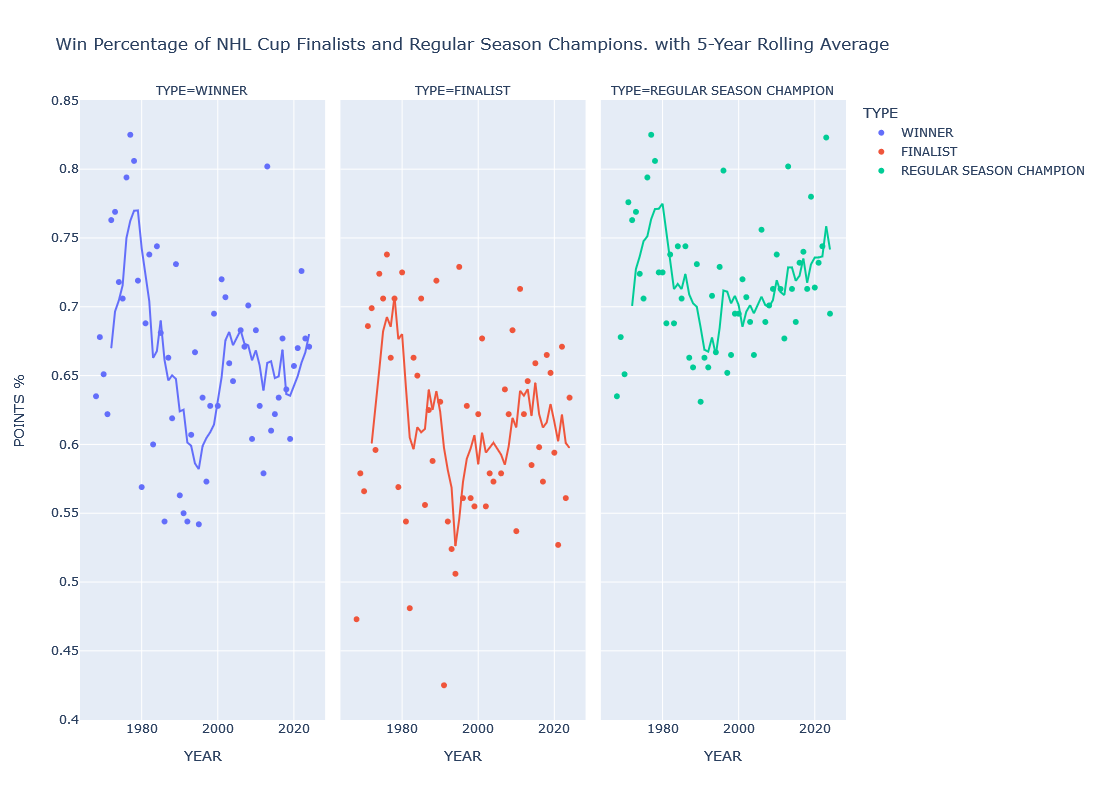

In [57]:
Scatter_Plot2 = px.scatter(New_df, x='YEAR', y="POINTS %", color="TYPE", trendline="rolling", trendline_options=dict(window=5),
                title="Win Percentage of NHL Cup Finalists and Regular Season Champions. with 5-Year Rolling Average",  
                facet_col="TYPE", hover_name="TEAM", width=1200, height=800) #Using facet_col to make it easier to vizualise the three trendlines.
Scatter_Plot2

While there seemed to be a general downward trend, I was surprised to see the trend rebound slightly back up. In other words, there is some sort of "valley" in each of the three trend lines in the early to mid 90s. It did coincide with the rapid expansion of the NHL going from 21 teams in 1991 to 30 by 200, as well as the advent of the so-called "Dead Puck Era" when average goals per game decreased from 8 in the 1980s to 5 by the mid-90s. The 90s saw a wave of Eastern European players entering the league following the fall of the Soviet Union and its allies. However, I fail to see how each of these events could even correlate to the "valley". Further investigation will be needed in the future.

I also observed that there was never a point where the trend line for FINALIST was greater than the trend line for WINNER, even though there have been instances where a team that finished with fewer points beat the team that finished with more points in the Finals. So it can be safe to assume that the team with the better regular season record really is the safer bet in the Finals.

## **Further Data Analysis**

While doing my data processing, I was fixated by the area between the "WINNER" and "REGULAR SEASON CHAMPION" trend lines. So naturally, I wanted to visualize that in a bar chart.

In [59]:
President=New_df[New_df["TYPE"]=="REGULAR SEASON CHAMPION"] #Extract data frame filtered for regular season champion
Winner=New_df[New_df["TYPE"]=="WINNER"] #Extract data frame filtered for Stanley Cup winner

In [60]:
a=President["POINTS %"]
b=Winner["POINTS %"]

In [61]:
diff=list(map(lambda x,y:x-y,a,b)) 
#for each year, we are finding the difference in point percentage between the regular season champion and the Stanley Cup winner.
#Of course, if the regular season champion is also the Stanley Cup champion, the difference is 0, although it's not always the reason that the difference
#is 0 (i.e., two teams finish with the same point percentage).

In [62]:
diff

[0.0,
 0.0,
 0.0,
 0.15400000000000003,
 0.0,
 0.0,
 0.006000000000000005,
 0.0,
 0.0,
 0.0,
 0.0,
 0.006000000000000005,
 0.15600000000000003,
 0.0,
 0.0,
 0.08799999999999997,
 0.0,
 0.02499999999999991,
 0.19999999999999996,
 0.0,
 0.03700000000000003,
 0.0,
 0.06800000000000006,
 0.11299999999999999,
 0.11199999999999999,
 0.10099999999999998,
 0.0,
 0.18699999999999994,
 0.16500000000000004,
 0.07900000000000007,
 0.03700000000000003,
 0.0,
 0.06699999999999995,
 0.0,
 0.0,
 0.029999999999999916,
 0.019000000000000017,
 0.07299999999999995,
 0.017999999999999905,
 0.0,
 0.10899999999999999,
 0.05499999999999994,
 0.08499999999999996,
 0.09800000000000009,
 0.0,
 0.10299999999999998,
 0.06699999999999995,
 0.09799999999999998,
 0.06299999999999994,
 0.07299999999999995,
 0.17600000000000005,
 0.05699999999999994,
 0.061999999999999944,
 0.018000000000000016,
 0.1459999999999999,
 0.02399999999999991]

In [63]:
x_axis=President["YEAR"]
y_axis=pd.Series(diff)

Text(0.5, 1.0, 'COMPARISON OF POINT PERCENTAGE (CUP WINNERS VS. REGULAR SEASON CHAMPIONS)')

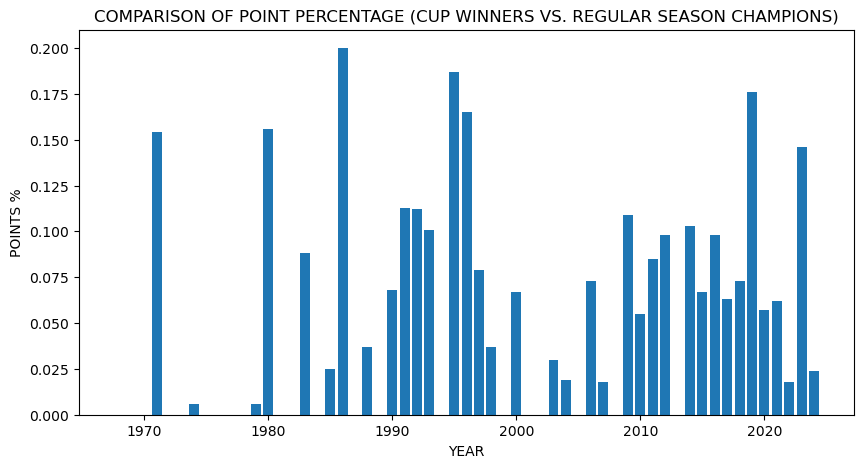

In [66]:
plt.figure(figsize=(10, 5))
plt.bar(x_axis, y_axis)
plt.xlabel("YEAR")
plt.ylabel("POINTS %")
plt.title("COMPARISON OF POINT PERCENTAGE (CUP WINNERS VS. REGULAR SEASON CHAMPIONS)")

It's now more common for a team that finished with the highest point percentage to NOT win the Cup versus back then, which reinforces the idea that the NHL is competitive. Also reinforcing that is the fact that the differences are usually larger compared to previous seasons.

## **Concluding Remarks**

The plots visualize how much different the current NHL era is than before, when regular season champions more often than not won the Cup, when dynasties and higher winning percentages were commonplace. Of course, there were a few surprises, especially with the aforementioned trend line valley from the 1990s, but ice hockey is full of surprises anyways.

I will say that if you are placing bets at every Stanley Cup Final, you should always definitely bet on the team with the better regular season record, you can thank my findings later.

With that said, who knows how different the NHL will be, even a decade from now. New teams, new rules, new variables can alter those trend lines. Of course, these mean little for the NHL players and coaches. The best way to find out what the outcome will be is to actually play the games until your season is over, rightfully so. However, for those wanting to create playoff brackets, make predictions and place bets, and for those working in the sports betting industry, hopefully these insights will be of use to them.
